# Imports

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Load Dataset

In [19]:
df_aux1 = pd.read_csv('US_births_1994-2003_CDC_NCHS.csv')
df_aux2 = pd.read_csv('US_births_2000-2014_SSA.csv')

df = pd.concat([df_aux1, df_aux2])

df.drop_duplicates(subset=['year', 'month', 'date_of_month'], inplace=True)

# Resetar o índice
df.reset_index(drop=True, inplace=True)


# Analisando o DF

In [20]:
df.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [21]:
df.describe(include='all')

,year,month,date_of_month,day_of_week,births
count,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000
mean,2004.000000,6.523077,15.729205,3.999870,11132.493742
std,6.055444,3.448888,8.800483,2.000359,2172.398653
min,1994.000000,1.000000,1.000000,1.000000,5728.000000
25%,1999.000000,4.000000,8.000000,2.000000,8759.000000
50%,2004.000000,7.000000,16.000000,4.000000,11941.000000
75%,2009.000000,10.000000,23.000000,6.000000,12754.750000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


In [22]:
#alterando os valores da coluna day_of_week
dias_semana = {
    1: 'Domingo',
    2: 'Segunda',
    3: 'Terça',
    4: 'Quarta',
    5: 'Quinta',
    6: 'Sexta',
    7: 'Sábado'
}

df['day_of_week'] = df['day_of_week'].map(dias_semana)

df.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,Sexta,8096
1,1994,1,2,Sábado,7772
2,1994,1,3,Domingo,10142
3,1994,1,4,Segunda,11248
4,1994,1,5,Terça,11053


## Verificando a presença de nulos

In [23]:
df.isnull().sum()

year             0
month            0
date_of_month    0
day_of_week      0
births           0
dtype: int64

## Detecção de outliers

<Axes: >

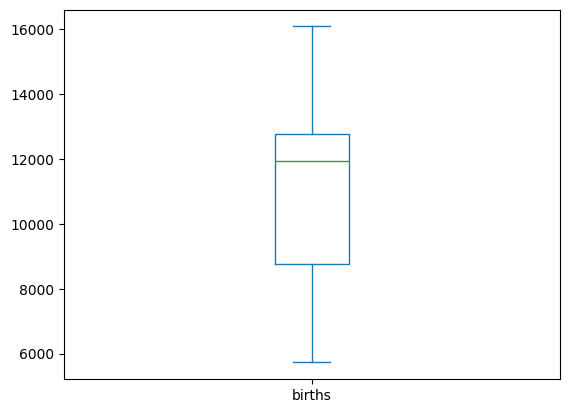

In [140]:
df['births'].plot.box()

<Axes: xlabel='births', ylabel='Count'>

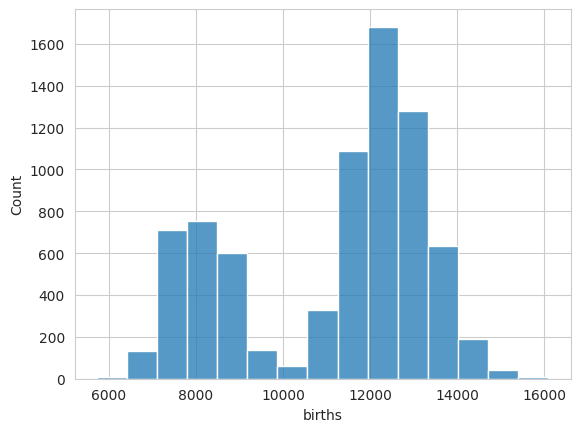

In [195]:
sns.histplot(df.births, bins=15)

## Qual a distribuição de nascimentos por ano?

<Axes: xlabel='year', ylabel='births'>

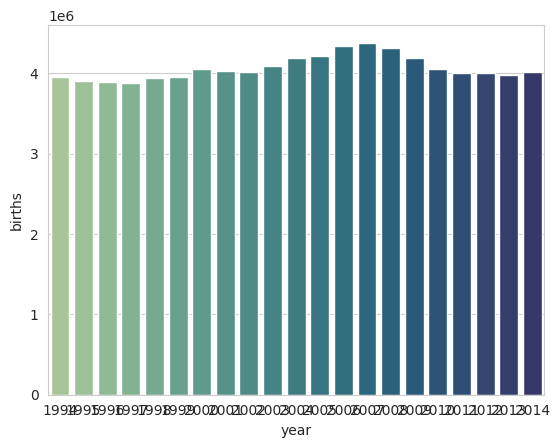

In [207]:
cols = ['year', 'births']
nascimentos_porano = df.loc[:, cols].groupby('year').sum()

sns.barplot(data=nascimentos_porano, x='year', y='births', hue='year', legend=False, palette='crest')

In [206]:
df[['year','births']].groupby(['year'], as_index = True).mean().sort_values(by='year',ascending=False)


,births
year,
2014,10987.758904
2013,10885.854795
2012,10931.333333
2011,10977.830137
2010,11112.260274
2009,11482.167123
2008,11777.969945
2007,12002.147945
2006,11877.134247


## Distribuição de nascimentos por dia da semana

<Axes: xlabel='day_of_week', ylabel='births'>

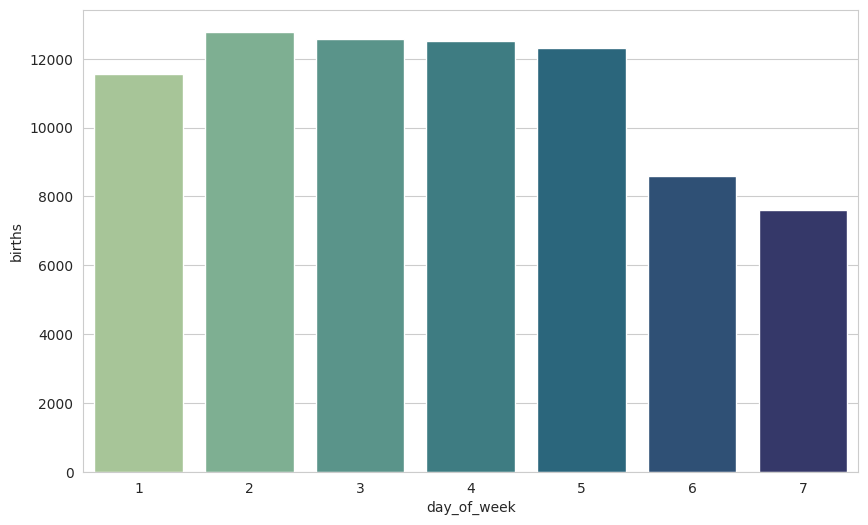

In [209]:
cols = ['day_of_week', 'births']
nascimentos_porano = df.loc[:, cols].groupby('day_of_week').mean()
nascimentos_porano
plt.figure(figsize=(10,6))
sns.barplot(data=nascimentos_porano, x='day_of_week', y='births', hue='day_of_week', palette='crest', legend=False)

## Distribuição por dia do mês

<Axes: xlabel='date_of_month', ylabel='births'>

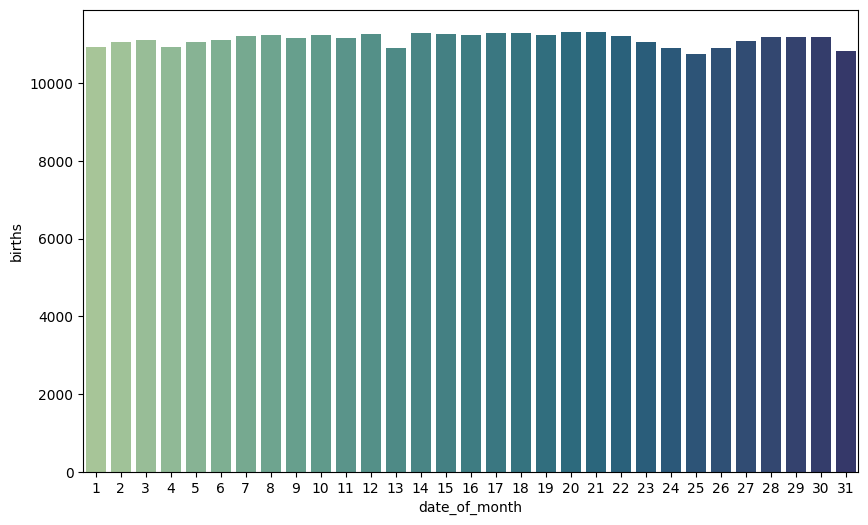

In [186]:
cols = ['date_of_month', 'births']
nascimentos_porano = df.loc[:, cols].groupby('date_of_month').mean().reset_index()
nascimentos_porano
plt.figure(figsize=(10,6))
sns.barplot(data=nascimentos_porano, x='date_of_month', y='births', hue='date_of_month', legend=False, palette='crest')

## Distribuição por mês

<Axes: xlabel='month', ylabel='births'>

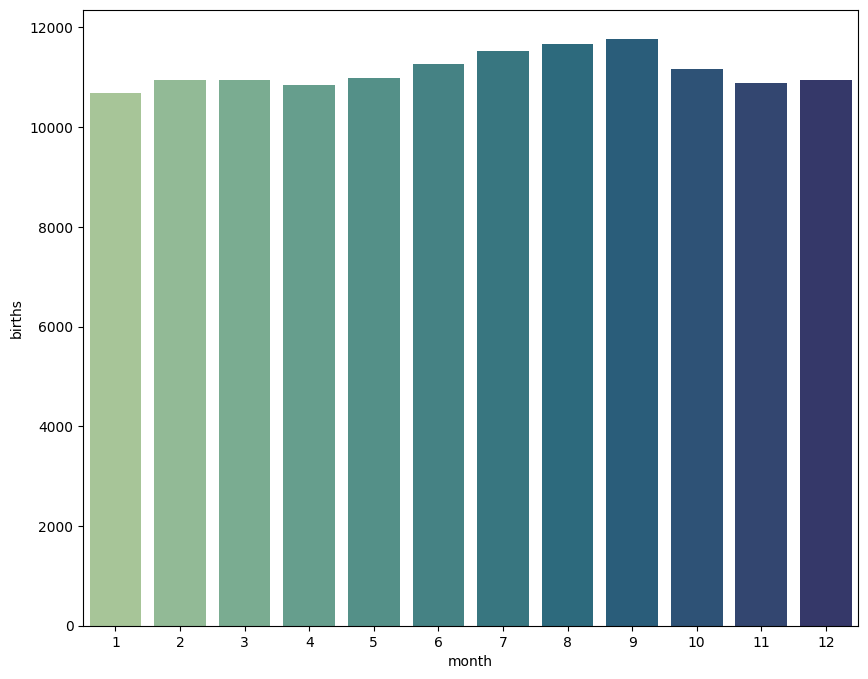

In [187]:
cols = ['month', 'births']
nascimentos_porano = df.loc[:, cols].groupby('month').mean().reset_index()
nascimentos_porano
plt.figure(figsize=(10,8))
sns.barplot(data=nascimentos_porano, x='month', y='births', hue='month', legend=False, palette='crest')

## Criar a coluna para sexta-feira 13

In [218]:
df['Sexta_13'] = (df['day_of_week']==6) & (df['date_of_month'] == 13)

contagem_sexta13 = df['Sexta_13'].value_counts()
pprint.pprint(contagem_sexta13)

Sexta_13
False    7634
True       36
Name: count, dtype: int64


In [219]:
media_nascimentos = df.groupby('Sexta_13')['births'].mean()
print(round(media_nascimentos, 3))

Sexta_13
False    11144.603
True      8564.694
Name: births, dtype: float64


In [228]:
# Criando uma lista com os dias específicos para sexta-feira
dias_aleatorios = [2,8, 12, 14,18, 24, 30]

# Verificando se o dia da semana é sexta-feira e o dia do mês está na lista de dias especiais
df['outras_sextas'] = (df['day_of_week'] == 6) & (df['date_of_month'].isin(dias_aleatorios))

## Pegando outras sextas feiras, mas que caem no dia 12 e 14 para descartar o viés de
## que nascem menos crianças em todas as sextas e sabados da semana.


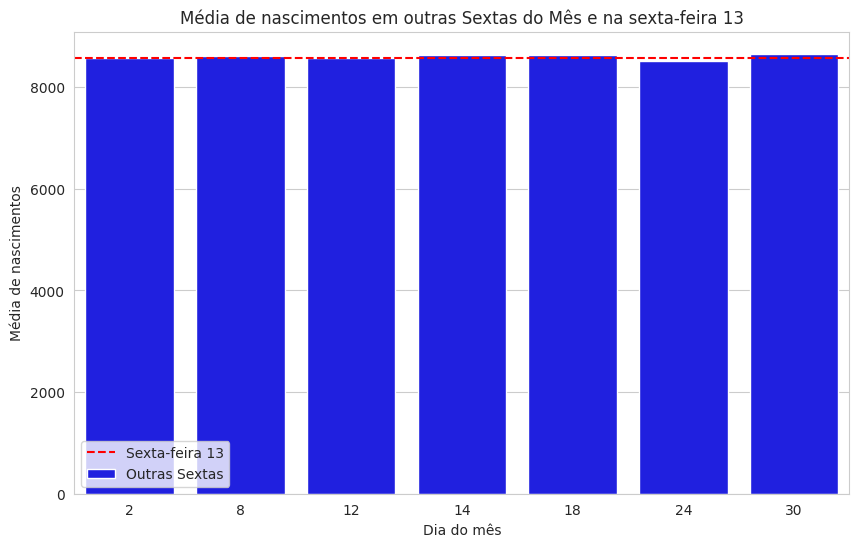

In [230]:
mean_friday_13th = df[df['Sexta_13']]['births'].mean()

# Plotar o gráfico usando Seaborn
plt.figure(figsize=(10, 6))

# Plotar a média de nascimentos nos dias próximos à sexta-feira 13
sns.barplot(x='date_of_month', y='births', data=df[df['outras_sextas']], color='blue', label='Outras Sextas', errorbar=None)

# Adicionar uma linha para a média de nascimentos na sexta-feira 13
plt.axhline(y=mean_friday_13th, color='red', linestyle='--', label='Sexta-feira 13')

plt.title('Média de nascimentos em outras Sextas do Mês e na sexta-feira 13')
plt.xlabel('Dia do mês')
plt.ylabel('Média de nascimentos')
plt.legend()
plt.show()

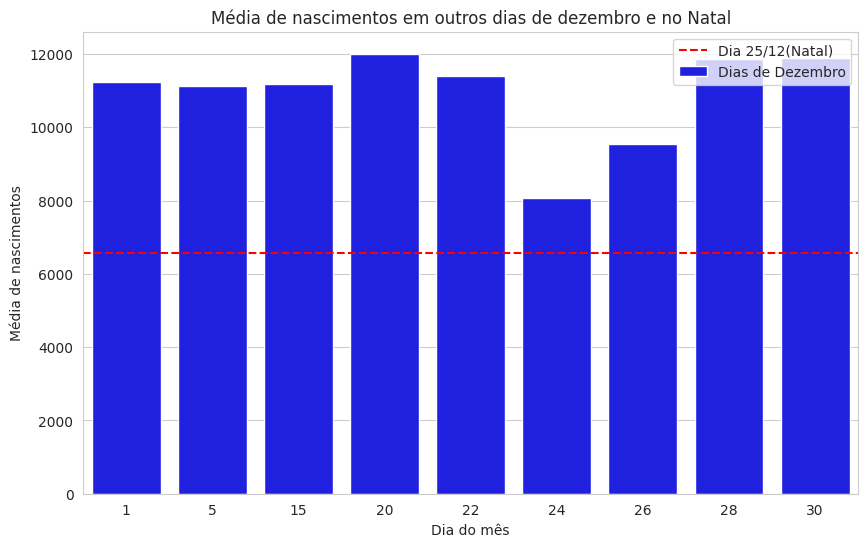

In [240]:
# Verificando se o dia da semana é sexta-feira e o dia do mês está na lista de dias especiais
df['natal'] = (df['month'] == 12) & (df['date_of_month'] == 25)
mean_natal = df[df['natal']]['births'].mean()

dias_proximo_natal = [1, 5, 15, 20, 24, 22, 26, 28, 30]
df['proximo_natal'] = (df['month'] == 12) & (df['date_of_month'].isin(dias_proximo_natal))

# Plotar o gráfico usando Seaborn
plt.figure(figsize=(10, 6))

# Plotar a média de nascimentos nos dias próximos à sexta-feira 13
sns.barplot(x='date_of_month', y='births', data=df[df['proximo_natal']], color='blue', label='Dias de Dezembro', errorbar=None)

# Adicionar uma linha para a média de nascimentos na sexta-feira 13
plt.axhline(y=mean_natal, color='red', linestyle='--', label='Dia 25/12(Natal)')

plt.title('Média de nascimentos em outros dias de dezembro e no Natal')
plt.xlabel('Dia do mês')
plt.ylabel('Média de nascimentos')
plt.legend()
plt.show()

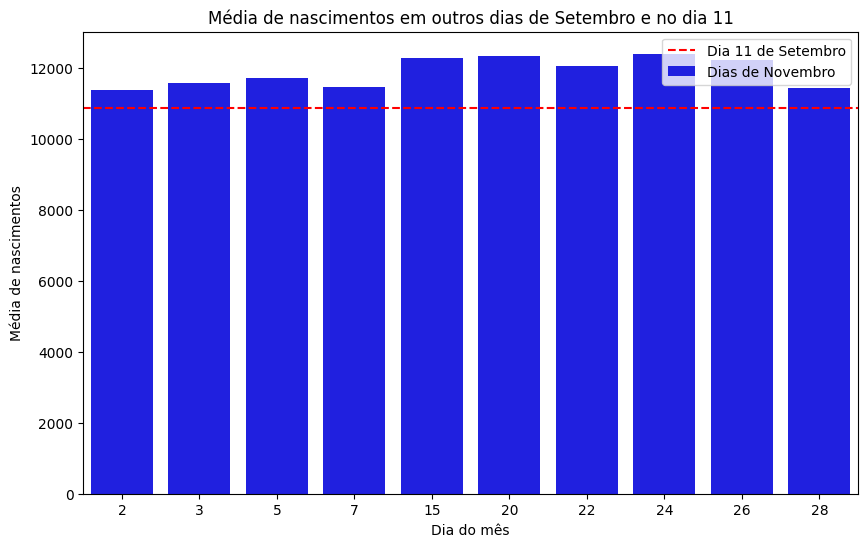

In [25]:
# Verificando se o dia é um 11 de setembro e pegando apenas anos apos 2002.
df['11_setembro'] = (df['month'] == 9) & (df['date_of_month'] == 11 & (df['year'] >= 2002))
mean_11_setembro = df[df['11_setembro']]['births'].mean()

# comparar com dias próximos a 11 de Setembro.
dias_proximo_11_setembro = [2 , 3, 5, 7, 15, 20, 22, 24, 26, 28]
df['proximo_11_setembro'] = (df['month'] == 9) & (df['year'] >= 2002) & (df['date_of_month'].isin(dias_proximo_11_setembro))

# Plotar o gráfico usando Seaborn
plt.figure(figsize=(10, 6))

# Plotar a média de nascimentos nos dias próximos à 11 de setembro
sns.barplot(x='date_of_month', y='births', data=df[df['proximo_11_setembro']], color='blue', label='Dias de Novembro', errorbar=None)

# Adicionar uma linha para a média de nascimentos no dia 11 de setembro
plt.axhline(y=mean_11_setembro, color='red', linestyle='--', label='Dia 11 de Setembro')

plt.title('Média de nascimentos em outros dias de Setembro e no dia 11')
plt.xlabel('Dia do mês')
plt.ylabel('Média de nascimentos')
plt.legend()
plt.show()